# Lista 11 - Aprendizado de Máquina

## Aluno: Ruan Felipe de Almeida Silva - 397048

In [243]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [244]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import model_selection

from sklearn import ensemble
from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn import linear_model
from sklearn import neural_network

### Resolva o problema de classificação binária sobre o dataset "Pima Indians Diabetes Database". 


#### Importação dos dados.

In [245]:
# dataframe = pd.read_csv('diabetes.csv', delimiter=',')
dataframe = pd.read_csv('/content/drive/MyDrive/ufc - ec/Aprend_Maquina/datasets/diabetes.csv', delimiter=',')
dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Verificando os tipos de dados do dataset.



In [246]:
dataframe.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

#### Verificando se existem valores faltantes no conjunto de dados.

In [247]:
dataframe.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Exibindo algumas informações sobre os dados do dataset.

In [248]:
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Dividindo o dataset nas features e no target e verificando os valores de target desse dataset.

In [249]:
X = dataframe.drop('Outcome', axis=1)
y = dataframe['Outcome']
np.unique(y)

array([0, 1])

#### Exibindo a quantidade de amostras existente em cada classe.

In [250]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

#### Exibindo os percentuais de amostras existentes em cada classe.

In [251]:
y.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

### 1. Separe os dados em treino (80%) e teste (20%).

In [252]:
X_values = X.values
y_values = y.values
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_values, y_values, test_size=0.2, random_state=742, stratify=y_values)
print("Conjunto x de treino:", X_train.shape[0])
print("Conjunto x de teste:", X_test.shape[0])
print("Conjunto y de treino:", y_train.shape[0])
print("Conjunto y de teste:", y_test.shape[0])

Conjunto x de treino: 614
Conjunto x de teste: 154
Conjunto y de treino: 614
Conjunto y de teste: 154


### 2. Crie os modelos a seguir sobre o conjunto de treino e calcule F1-Score sobre os dados de treino e de teste usando:

1. Random Forest.
2. Gradient Boosting do Scikit Learn
3. XGBoost - https://xgboost.readthedocs.io/
4. LightGBM - https://lightgbm.readthedocs.io/
5. CatBoost - https://catboost.ai/
6. Perceptron - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html
7. Multi-layer Perceptron - https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

#### Instalação das bibliotecas.

In [253]:
#!pip install xgboost
#!pip install lightgbm
#!pip install catboost

#### Criação dos modelos de classificadores.

In [254]:
rf = ensemble.RandomForestClassifier(random_state=42, n_estimators=400, criterion='gini', max_depth=4, min_samples_leaf=30)
gb = ensemble.GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.01, max_depth=4, min_samples_leaf=20)
xgb = XGBClassifier(random_state=42, max_depth=7, learning_rate=0.01, n_estimators=250)
lgbm = LGBMClassifier(random_state=42, learning_rate=0.01, n_estimators=250)
cb = CatBoostClassifier(random_state=42, verbose=False, learning_rate=0.01, iterations=350)
percep = linear_model.Perceptron(random_state=42)
mlp = neural_network.MLPClassifier(random_state=42, max_iter=200, learning_rate='adaptive', learning_rate_init=0.01, activation='relu')

models = [rf, gb, xgb, lgbm, cb, percep, mlp]
labels = ['Random Forest', 'Gardient Boosting', 'XGBoost', 'LightGBM', 'CatBoost', 'Perceptron', 'Multi-layer Perceptron']


#### Treinando os modelos criados e observando a métrica f1-score atingida por cada um ao aplicar os dados de treino e os dados de teste.


In [255]:
results = []

for model, label in zip(models, labels):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    f1score_train = metrics.f1_score(y_train, y_pred_train, average='weighted')
    f1score_test = metrics.f1_score(y_test, y_pred_test, average='weighted')
    
    print(f'Model: {label}')
    print(f'F1-Score: Train: {f1score_train}')
    print(f'F1-Score Test: {f1score_test}')
    print("--------------------------------------------------\n")

    results.append({'Model': label, 'F1-Score Train': f1score_train, 'F1-Score Test': f1score_test})
    

Model: Random Forest
F1-Score: Train: 0.7681713835908348
F1-Score Test: 0.8059194433357721
--------------------------------------------------

Model: Gardient Boosting
F1-Score: Train: 0.7999565268938397
F1-Score Test: 0.7791497113820854
--------------------------------------------------

Model: XGBoost
F1-Score: Train: 0.9541334059877978
F1-Score Test: 0.7711598746081505
--------------------------------------------------

Model: LightGBM
F1-Score: Train: 0.9020622717645257
F1-Score Test: 0.765185682988784
--------------------------------------------------

Model: CatBoost
F1-Score: Train: 0.8749709472816557
F1-Score Test: 0.7925345773589287
--------------------------------------------------

Model: Perceptron
F1-Score: Train: 0.6394671447868538
F1-Score Test: 0.6573238297967025
--------------------------------------------------

Model: Multi-layer Perceptron
F1-Score: Train: 0.6961297285252942
F1-Score Test: 0.6993530030179245
--------------------------------------------------



#### Criando um dataframe com os resultados de F1-Scores obtidos em cada modelo e exibindo esse dataframe ordenando decrescentemente pelo F1-Score do conjunto de teste.


In [256]:
df_models = pd.DataFrame(results)
df_models_ord = df_models.sort_values(by='F1-Score Test', ascending=False)
df_models_ord

,Model,F1-Score Train,F1-Score Test
0,Random Forest,0.768171,0.805919
4,CatBoost,0.874971,0.792535
1,Gardient Boosting,0.799957,0.779150
2,XGBoost,0.954133,0.771160
3,LightGBM,0.902062,0.765186
6,Multi-layer Perceptron,0.696130,0.699353
5,Perceptron,0.639467,0.657324


#### Plotando um gráfico de barras com os valores de F1-Score de treino e teste alcançados em cada modelo.

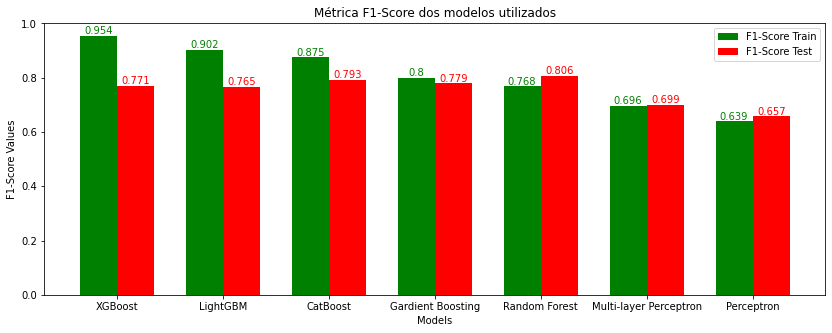

In [257]:
plt.figure(figsize = (14, 5))

barWidth = 0.35

df_models_ord_train = df_models.sort_values(by='F1-Score Train', ascending=False)

p1 = np.arange(df_models_ord_train.shape[0])
p2 = [p + barWidth for p in p1]

plt.bar(p1, df_models_ord_train['F1-Score Train'], color='green', width=barWidth, label='F1-Score Train')
plt.bar(p2, df_models_ord_train['F1-Score Test'], color='red', width=barWidth, label='F1-Score Test')

for value, position in zip(df_models_ord_train['F1-Score Train'], p1):
    plt.annotate(f'{round(value, 3)}', xy=(position, value), va='bottom', ha='center', color='green')

for value, position in zip(df_models_ord_train['F1-Score Test'], p2):
    plt.annotate(f'{round(value, 3)}', xy=(position, value), va='bottom', ha='center', color='red')

plt.legend()
plt.xlabel('Models')
plt.ylabel('F1-Score Values')
plt.title('Métrica F1-Score dos modelos utilizados')
plt.xticks((p1+p2)/2, df_models_ord_train['Model'])
plt.show()